<a href="https://colab.research.google.com/github/vijayamukati/FINALPROJECTS/blob/main/assignment2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

# Load dataset
from google.colab import files
uploaded = files.upload()

Saving traffic.csv to traffic.csv


In [5]:
# Load the dataset into a DataFrame
df = pd.read_csv('traffic.csv')

# Display the first few rows of the dataset
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [6]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Filter the data based on event types
pageview_df = df[df['event'] == 'pageview']
click_df = df[df['event'] == 'click']

In [8]:
# 1: Total and Daily Pageview Events
# 1.1 Total pageview events
total_pageviews = pageview_df.shape[0]

# 1.2 Average pageviews per day
daily_pageviews = pageview_df.groupby(pageview_df['date'].dt.date).size()
average_pageviews_per_day = daily_pageviews.mean()

print(f"Total pageviews: {total_pageviews}")
print(f"Average pageviews per day: {average_pageviews_per_day}")

Total pageviews: 142015
Average pageviews per day: 20287.85714285714


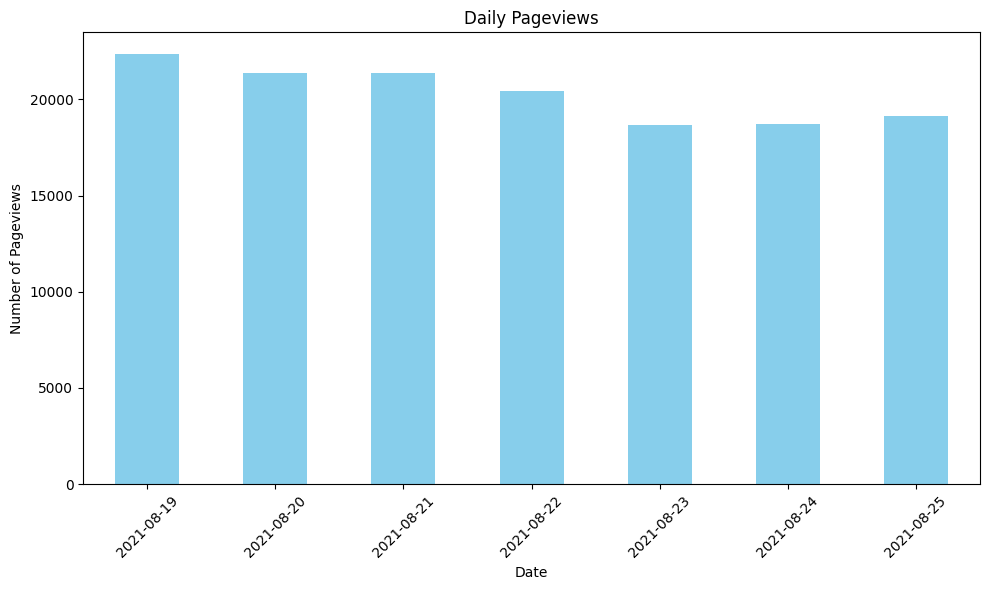

In [9]:
# Plot 1: Daily Pageviews
plt.figure(figsize=(10, 6))
daily_pageviews.plot(kind='bar', color='skyblue')
plt.title("Daily Pageviews")
plt.xlabel("Date")
plt.ylabel("Number of Pageviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# 2: Analysis of Other Events
# Get the total count of non-pageview events
non_pageview_df = df[df['event'] != 'pageview']
other_event_distribution = non_pageview_df['event'].value_counts()

print("Distribution of other events:")
print(other_event_distribution)

Distribution of other events:
event
click      55732
preview    28531
Name: count, dtype: int64


<ipython-input-11-3bc756ffe478>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=other_event_distribution.index, y=other_event_distribution.values, palette='viridis')


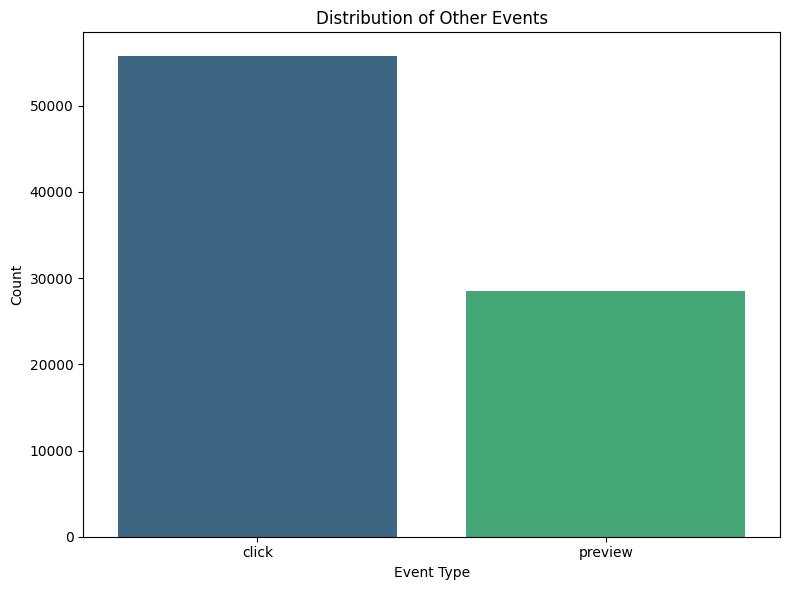

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=other_event_distribution.index, y=other_event_distribution.values, palette='viridis')
plt.title("Distribution of Other Events")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [12]:
# 3: Geographical Distribution
# 3.1 Total pageviews by country
pageviews_by_country = pageview_df['country'].value_counts()

print("Pageviews by country:")
print(pageviews_by_country)

Pageviews by country:
country
Saudi Arabia         28873
India                27286
United States        20839
France                9674
Iraq                  4897
                     ...  
Wallis and Futuna        1
Solomon Islands          1
Guinea-Bissau            1
Lesotho                  1
Saint Martin             1
Name: count, Length: 211, dtype: int64


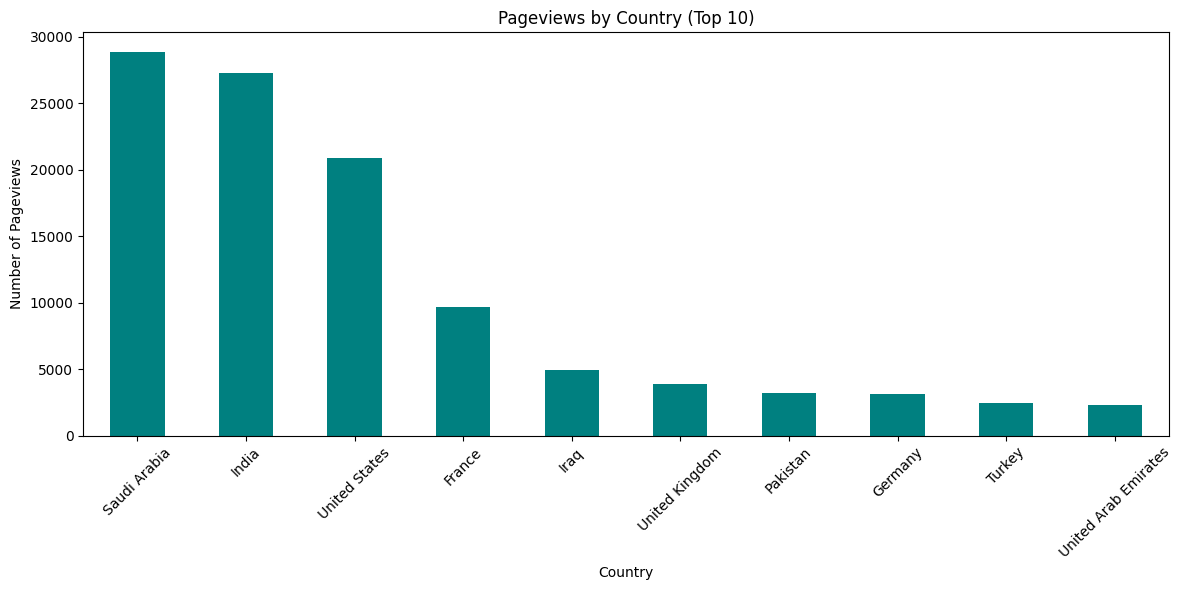

In [13]:
plt.figure(figsize=(12, 6))
pageviews_by_country.head(10).plot(kind='bar', color='teal')  # Top 10 countries
plt.title("Pageviews by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Number of Pageviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
#  4: Click-Through Rate (CTR) Analysis

# 4.1 Calculate overall CTR
# CTR = clicks / pageviews
clicks_by_link = click_df['linkid'].value_counts()
pageviews_by_link = pageview_df['linkid'].value_counts()

# Combine click and pageview data
ctr_data = pd.DataFrame({
    'clicks': clicks_by_link,
    'pageviews': pageviews_by_link
}).fillna(0)

# Calculate CTR per link
ctr_data['CTR'] = ctr_data['clicks'] / ctr_data['pageviews']

# 4.2 Overall CTR
overall_ctr = ctr_data['clicks'].sum() / ctr_data['pageviews'].sum()

print(f"Overall CTR: {overall_ctr}")
print("CTR by link:")
print(ctr_data[['CTR']])

Overall CTR: 0.3924374185825441
CTR by link:
                                      CTR
linkid                                   
00073307-ae96-5089-a117-4783afb42f8e  0.0
00126b32-0c35-507b-981c-02c80d2aa8e7  1.0
0018cfff-50a1-5984-9715-01ef2d11a49a  0.0
0033934b-5d16-5a06-af58-d087bcdd3680  0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608  0.0
...                                   ...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5  1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7  0.0
fff84c0e-90a1-59d8-9997-adc909d50e16  1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479  0.5
fffd0045-29de-522b-b5d8-35786363bf07  0.5

[3839 rows x 1 columns]


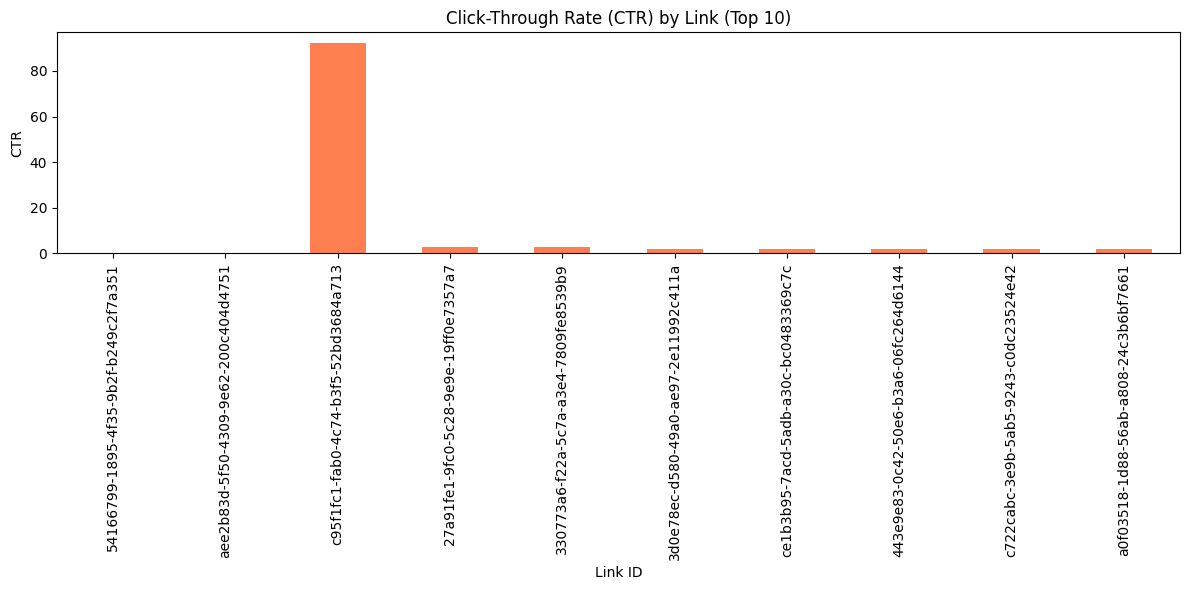

In [15]:
plt.figure(figsize=(12, 6))
ctr_data['CTR'].sort_values(ascending=False).head(10).plot(kind='bar', color='coral')  # Top 10 links by CTR
plt.title("Click-Through Rate (CTR) by Link (Top 10)")
plt.xlabel("Link ID")
plt.ylabel("CTR")
plt.tight_layout()
plt.show()

In [16]:
# 5: Correlation Analysis
# 5.1 Correlation between clicks and previews (CTR)
# Assuming 'preview' is another event type in the dataset
preview_df = df[df['event'] == 'preview']
previews_by_link = preview_df['linkid'].value_counts()

# Merging preview and click data
preview_click_data = pd.DataFrame({
    'clicks': clicks_by_link,
    'previews': previews_by_link
}).fillna(0)

In [17]:
# Perform Pearson correlation
corr, p_value = pearsonr(preview_click_data['clicks'], preview_click_data['previews'])
print(f"Correlation between clicks and previews: {corr}, p-value: {p_value}")

Correlation between clicks and previews: 0.9886810823208138, p-value: 0.0


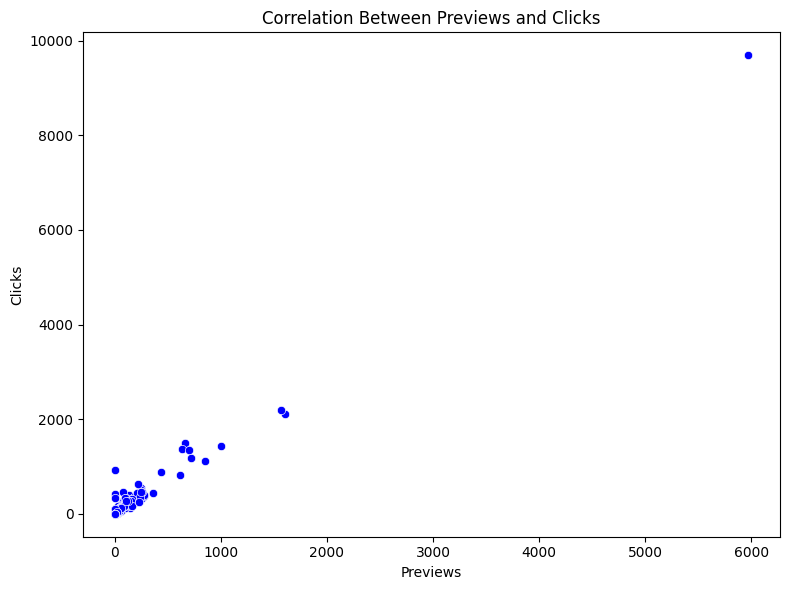

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=preview_click_data['previews'], y=preview_click_data['clicks'], color='blue')
plt.title("Correlation Between Previews and Clicks")
plt.xlabel("Previews")
plt.ylabel("Clicks")
plt.tight_layout()
plt.show()

In [19]:
# 5.2 Categorical correlation test (if needed, for binary variables)
# Assuming we are checking if click rates differ based on a binary variable (like isrc)
contingency_table = pd.crosstab(df['isrc'], df['event'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test result: chi2 = {chi2}, p-value = {p}")

Chi-square test result: chi2 = 6327.533239174205, p-value = 0.0
